## Feature Extraction and Price Prediction for Mobile Phones

#### Here are the list of Libraries that we are going to use for Feature Prediction

In [31]:
import pandas as pd  ## Helps to load the dataset, perform different function like Cleaning, filtering & merging
import numpy as np  ## Used for different functionality in one and multidimensional array objects
import seaborn as sns  ## Seaborn is the powerful library that help to create different plots in Python
import matplotlib.pyplot as plt  ## Matplotlib is the library that used to make plot more effective with the help of graphics

## SkLearn library has different inbuilt models & Functions that will make our work easier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

## 1. Loading the Dataset

#### For Price Prediction, we are using the Mobile Phone details

In [32]:
df = pd.read_csv('Processed_Flipdata.csv')
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


## 2. Data Preprocessing

#### Before using raw data we need to preprocess the data for better results
==> Remove unnecessary characters & spaces from data 
==> Convert the data type that is necessary

In [33]:
# Remove commas and convert Prize to integer
df['Prize'] = df['Prize'].astype(str).str.replace(',', '').astype(int)

# Ensure string type before using .str methods
df['Rear Camera'] = df['Rear Camera'].astype(str).str.replace('MP', '').astype(float)
df['Front Camera'] = df['Front Camera'].astype(str).str.replace('MP', '').astype(float)

# Handle missing values
df.fillna(method='ffill', inplace=True)

C:\Users\Dimple\AppData\Local\Temp\ipykernel_8156\1273557731.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


#### Outlier Detection of the data, Visualization the Outliers with the help of BOX PLOT

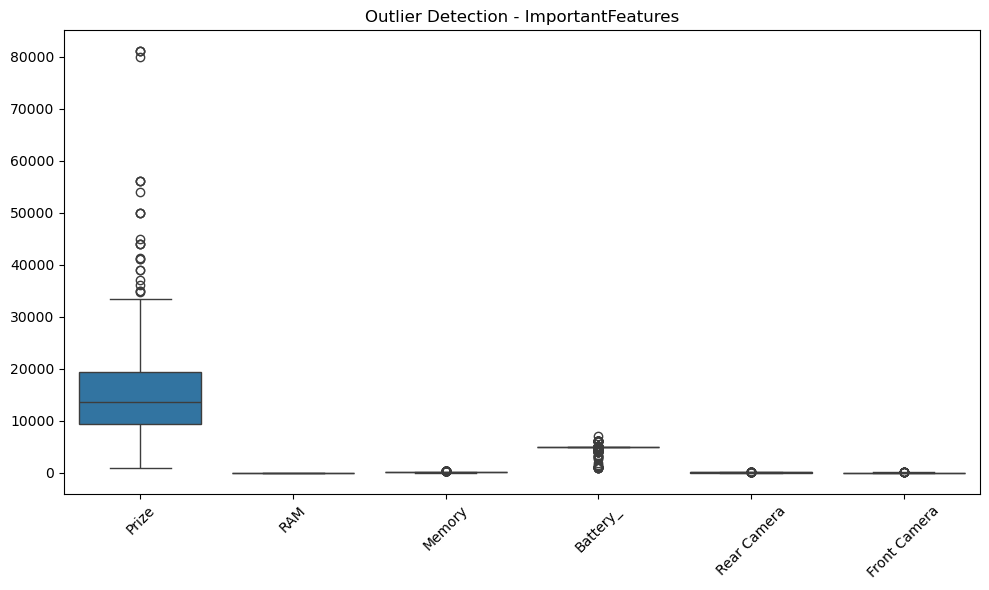

In [46]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Prize', 'RAM', 'Memory', 'Battery_', 'Rear Camera', 'Front Camera']])
plt.title("Outlier Detection - ImportantFeatures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Convert categorical variables (e.g., model, colour, Processor) into a suitable numerical format, such as one-hot encoding

In [37]:
# One-hot Encoding for categorical columns
categorical_cols = ['Model', 'Colour', 'Processor_']
numerical_cols = df.drop(['Model', 'Colour', 'Processor_', 'Prize'], axis=1).columns.tolist()

## 3. Feature Extraction

#### Perform feature extraction to identify the most relevant features that strongly affect the price of mobile phones

In [38]:
# Feature Matrix and Target
X = df.drop('Prize', axis=1)
y = df['Prize']

In [39]:
# Column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

## 4. Model Building

#### Split the dataset into training and testing sets

In [40]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Different Machine learning model for price prediction

#### A. Linear Regression

In [66]:
linreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [67]:
linreg_pipeline.fit(X_train, y_train)
y_pred_lin = linreg_pipeline.predict(X_test)

#### B. Gradient Boosting Regressor

In [68]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42))
])

In [69]:
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

## 5. Model Evaluation

#### Evaluate the model's performance using appropriate metrics to assess how accurately it predicts mobile phone prices
==> e.g., mean absolute error, root mean squared error

In [70]:
def evaluate_model(name, y_true, y_pred):
    print(f" * {name} Performance:")
    print(f"  MAE : {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"  RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"  R²  : {linreg_pipeline.score(X_test, y_test):.2f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lin)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)

 * Linear Regression Performance:
  MAE : 2152.44
  RMSE: 6204.19
  R²  : 0.72

 * Gradient Boosting Performance:
  MAE : 1883.20
  RMSE: 4712.56
  R²  : 0.72



## 6. Feature Importance Analysis

#### Analyze the feature importances obtained from model to confirm the significance of the features identified during the feature extraction phase

In [71]:
# Feature Importance (Gradient Boosting)
model = gb_pipeline.named_steps['model']
ohe = gb_pipeline.named_steps['preprocessor'].named_transformers_['cat']
feature_names = ohe.get_feature_names_out(categorical_cols).tolist() + numerical_cols
importances = model.feature_importances_

In [72]:
# Create dataframe for feature importance
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

#### Data Visualizaton that shows the Importance of feature for Price Prediction

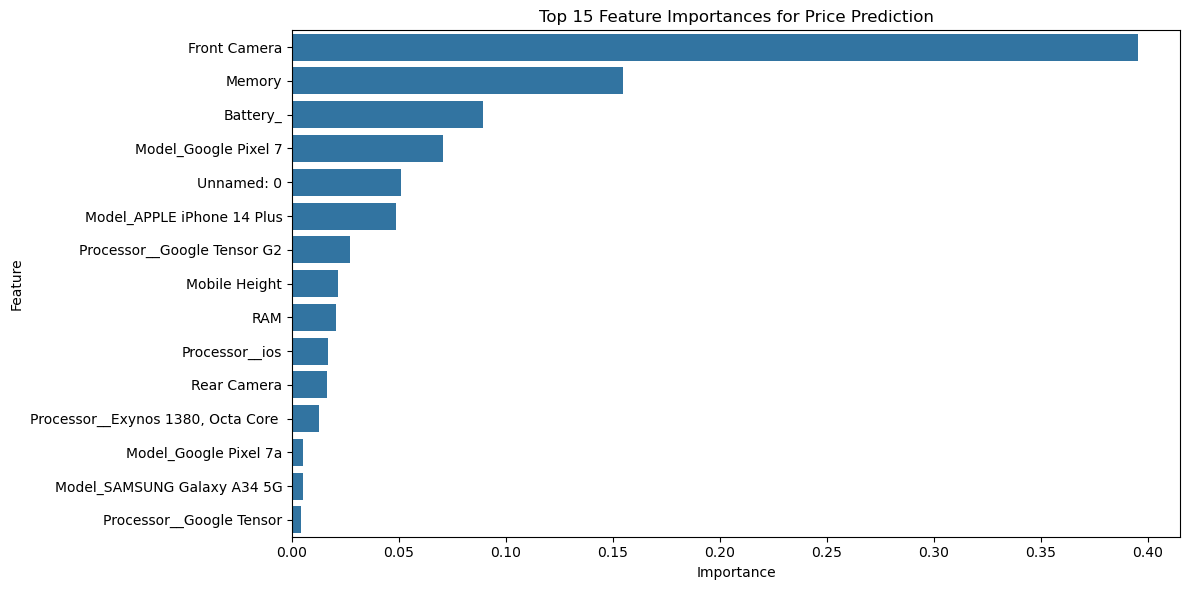

In [73]:
# Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=feat_imp.head(15), x='Importance', y='Feature')
plt.title('Top 15 Feature Importances for Price Prediction')
plt.tight_layout()
plt.show()

#### Correlation Matrix for Numerical Features

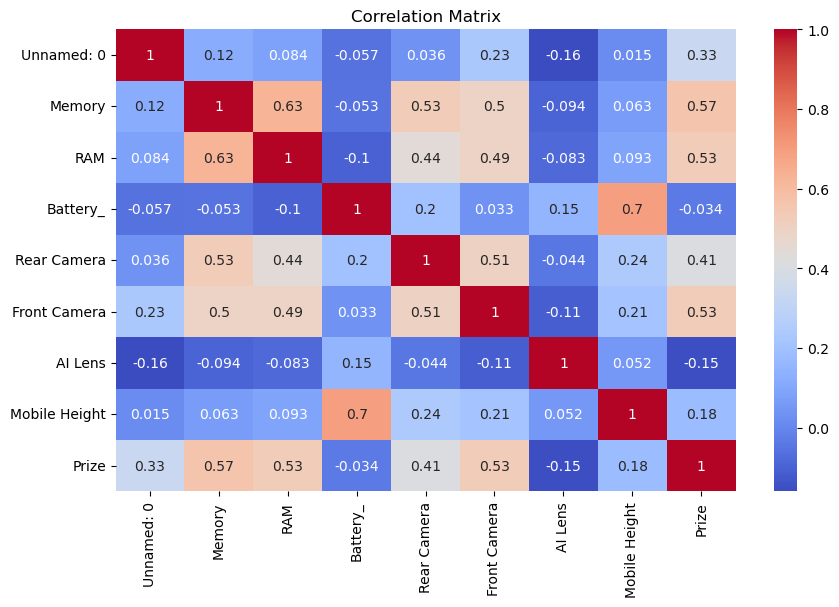

In [63]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols + ['Prize']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Recommendations :

In [65]:
print("\n ** Recommendations:")
top_features = feat_imp.head(5)['Feature'].tolist()
print("Top features influencing mobile phone price:")
for i, feat in enumerate(top_features, 1):
    print(f"  {i}. {feat}")
print("These features can guide pricing strategies and highlight customer preferences.")


 ** Recommendations:
Top features influencing mobile phone price:
  1. Front Camera
  2. Memory
  3. Battery_
  4. Model_Google Pixel 7
  5. Unnamed: 0
These features can guide pricing strategies and highlight customer preferences.
